# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 4 - Aprendizaje No Supervisado

# Introducción

En finanzas, encontrar grupos de activos similares o regímenes en el comportamiento de los precios es de mucha utilidad, y es de gran ayuda en el desarrollo de filtros, definición de reglas de compra/venta, etc. 

En este práctico aplicaremos métodos de aprendizaje no supervisado. Estas metodologías en muchos casos son aplicadas antes de las de aprendizaje supervisado, dado que frecuentemente nos permiten obtener información útil de nuestros datos.

Podemos destacar métodos como clustering y reducción de dimensionalidad. Algunas de las metodologías despliegan su máximo potencial cuando se dispone de grandes cantidades de datos (activos en nuestro caso).

# 📖 ¡Actividades!

Analizaremos las variaciones (tasas de cambio) de los activos en ventanas específicas de tiempo. Nuestro objetivo será encontrar activos con comportamiento similiar en término de sus retornos.

Para esta actividad seleccionen periodos en los cuales esté disponible la data de todos los activos. 

## Parte I 

Una forma sencilla de predecir el comportamiento de los activos sería suponer que todos siguen el mismo modelo de aprendizaje automático y crear este modelo global para predecir los rendimientos de todos los activos. Sin embargo, es posible que ellos reaccionen de manera diferente a un conjunto de indicadores técnicos. Una forma de resolver este problema es crear un modelo diferente para grupos de activos que se espera que se comporten de manera similar.

Evaluen los siguientes algoritmos de clusterización. 

- Mean Shift.
- k-means. 
- Clustering Jerárquico 

¿Qué activos forman parte de cada cluster? ¿Encuentran alguna relación dentro de cada grupo?

## Parte II 

- Usar la medida de distancia dynamic time warping para agrupar por k-means y comparar con lo obtenido con la métrica euclídea ([link](https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3)). Comente los resultados.

## Opcional 

- Aplicar factores dinámicos para ver si las tasas de retorno se pueden resumir en uno o unos pocos constructos subyacentes ([link](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_dfm_coincident.html))

# Fecha de entrega

- __Versión preliminar: 12/9__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

#clusters
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [2]:
df = pd.read_csv('../2tp_analisisYCuracion/Activos limpios con features - 2tp - Final.csv',index_col='Fecha')

In [3]:
df

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 11:00:00,30.09000,31.00000,29.91000,30.84000,2.099238e+05,AXSUSDT,2,5,2022,Monday,...,5.405922,27.455252,35.588711,-1.980730,31.0060,31.412000,1.013094,1.690649e+05,2.517633e+05,0.671523
2022-05-02 11:00:00,38711.87000,39155.47000,38242.51000,38840.00000,1.745554e+04,BTCUSDT,2,5,2022,Monday,...,4.968616,76.953079,77.404507,-137.983866,38681.2480,38350.076667,0.991438,8.922673e+03,7.053100e+03,1.265071
2022-05-02 11:00:00,2.07100,2.10900,2.03400,2.09400,3.760029e+06,EOSUSDT,2,5,2022,Monday,...,6.256037,48.181818,56.219706,-0.055727,2.0912,2.109800,1.008894,2.650436e+06,2.843629e+06,0.932061


In [4]:
def status(data):

    data2=data 
    # total de rows
    tot_rows=len(data2)
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values
    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows
    # total unique values
    d2['unique']=data2.nunique().values
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    return(d2)

In [5]:
columns_interesting = ['close','active']
df_filter = df[columns_interesting]
df_filter

,close,active
Fecha,,
2019-01-01 03:00:00,0.35073,XRPUSDT
2019-01-01 03:00:00,133.36000,ETHUSDT
2019-01-01 03:00:00,2.53830,EOSUSDT
2019-01-01 03:00:00,0.04061,ADAUSDT
2019-01-01 03:00:00,30.12000,LTCUSDT
...,...,...
2022-05-02 11:00:00,30.84000,AXSUSDT
2022-05-02 11:00:00,38840.00000,BTCUSDT
2022-05-02 11:00:00,2.09400,EOSUSDT


In [6]:
df_filter.index = pd.to_datetime(df_filter.index)
df_filter

,close,active
Fecha,,
2019-01-01 03:00:00,0.35073,XRPUSDT
2019-01-01 03:00:00,133.36000,ETHUSDT
2019-01-01 03:00:00,2.53830,EOSUSDT
2019-01-01 03:00:00,0.04061,ADAUSDT
2019-01-01 03:00:00,30.12000,LTCUSDT
...,...,...
2022-05-02 11:00:00,30.84000,AXSUSDT
2022-05-02 11:00:00,38840.00000,BTCUSDT
2022-05-02 11:00:00,2.09400,EOSUSDT


In [7]:
contador = 0
for i in set(df_filter.active):
    aux = df_filter[df_filter.active == i]
    aux2 = aux.resample("d").mean()
    aux2['active'] = i
    if contador == 0:
        df_filter_daily = aux2.copy()
        contador += 1
    else:
        df_filter_daily = pd.concat([df_filter_daily, aux2])
        df_filter_daily = df_filter_daily.dropna()

In [8]:
status(df_filter_daily)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,close,0,0.0,0,0.0,19132,float64
1,active,0,0.0,0,0.0,19,object


In [61]:

# df_filter_daily_ETH = df_filter_daily[df_filter_daily.active == 'ETHUSDT']
# columns_interesting = ['close','active']
# df_filter_daily_ETH_2 = df_filter_daily_ETH[columns_interesting]
# df_filter_daily_ETH_2

,close,active
Fecha,,
2019-01-01,134.841667,ETHUSDT
2019-01-02,148.681667,ETHUSDT
2019-01-03,147.696667,ETHUSDT
2019-01-04,151.243333,ETHUSDT
2019-01-05,153.668333,ETHUSDT
...,...,...
2022-04-28,2916.566667,ETHUSDT
2022-04-29,2850.498333,ETHUSDT
2022-04-30,2796.505000,ETHUSDT


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
contador = 0
for i in set(df_filter_daily.active):
    aux = df_filter_daily[df_filter_daily.active == i]
    aux[['Scalar_close']] = scaler.fit_transform(aux[["close"]])
    if contador == 0:
        df_filter_daily_scalar = aux.copy()
        contador += 1
    else:
        df_filter_daily_scalar = pd.concat([df_filter_daily_scalar, aux])
        # df_filter_daily_scalar = df_filter_daily.dropna()

In [10]:
status(df_filter_daily_scalar)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,close,0,0.0,0,0.00000,19132,float64
1,active,0,0.0,0,0.00000,19,object
2,Scalar_close,0,0.0,19,0.00098,19264,float64


In [11]:
# df_filter_daily_scalar = df_filter_daily_scalar.reset_index()
df_filter_daily_scalar

,close,active,Scalar_close
Fecha,,,
2019-01-01,3711.508333,BTCUSDT,0.004781
2019-01-02,3813.705000,BTCUSDT,0.006380
2019-01-03,3786.513333,BTCUSDT,0.005955
2019-01-04,3768.083333,BTCUSDT,0.005666
2019-01-05,3790.383333,BTCUSDT,0.006015
...,...,...,...
2022-04-28,96.716667,DASHUSDT,0.148282
2022-04-29,94.366667,DASHUSDT,0.142204
2022-04-30,90.733333,DASHUSDT,0.132808


In [12]:
df_filter_daily_scalar = df_filter_daily_scalar.reset_index()
df_filter_daily_scalar

,Fecha,close,active,Scalar_close
0,2019-01-01,3711.508333,BTCUSDT,0.004781
1,2019-01-02,3813.705000,BTCUSDT,0.006380
2,2019-01-03,3786.513333,BTCUSDT,0.005955
3,2019-01-04,3768.083333,BTCUSDT,0.005666
4,2019-01-05,3790.383333,BTCUSDT,0.006015
...,...,...,...,...
19387,2022-04-28,96.716667,DASHUSDT,0.148282
19388,2022-04-29,94.366667,DASHUSDT,0.142204
19389,2022-04-30,90.733333,DASHUSDT,0.132808
19390,2022-05-01,88.050000,DASHUSDT,0.125868


In [13]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar.pivot(index='Fecha', columns='active', values='Scalar_close')
df_filter_daily_scalar_pivot

active,AAVEUSDT,ADAUSDT,AXSUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DASHUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,NEOUSDT,XMRUSDT,XRPUSDT
Fecha,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,0.005710,NaN,NaN,0.000350,0.004781,NaN,NaN,NaN,NaN,0.067407,0.011935,0.006627,NaN,0.000000,NaN,0.018237,NaN,0.129595
2019-01-02,NaN,0.006474,NaN,NaN,0.000395,0.006380,NaN,NaN,NaN,NaN,0.083509,0.013584,0.009590,NaN,0.004817,NaN,0.020934,NaN,0.136941
2019-01-03,NaN,0.006322,NaN,NaN,0.000272,0.005955,NaN,NaN,NaN,NaN,0.078523,0.012143,0.009380,NaN,0.003131,NaN,0.019209,NaN,0.131810
2019-01-04,NaN,0.006331,NaN,NaN,0.000363,0.005666,NaN,NaN,NaN,NaN,0.076682,0.012154,0.010139,NaN,0.003712,NaN,0.018292,NaN,0.129366
2019-01-05,NaN,0.006748,NaN,NaN,0.000469,0.006015,NaN,NaN,NaN,NaN,0.077579,0.012397,0.010658,NaN,0.009979,NaN,0.019956,NaN,0.129465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,0.237228,0.275676,0.242736,0.108938,0.600821,0.567032,0.049676,0.148282,0.200322,0.281043,0.042248,0.223259,0.602229,0.245493,0.207133,0.765416,0.115549,0.443837,0.308104
2022-04-29,0.220022,0.266046,0.221819,0.102228,0.593493,0.554641,0.041675,0.142204,0.198051,0.269324,0.040335,0.212405,0.588083,0.236940,0.202235,0.738177,0.109420,0.429663,0.292798
2022-04-30,0.209026,0.257196,0.203805,0.093625,0.583511,0.546482,0.032986,0.132808,0.191675,0.252916,0.028692,0.199211,0.576522,0.225446,0.197577,0.699113,0.104919,0.428584,0.287105


In [14]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar_pivot.dropna()

In [15]:
df_filter_daily_scalar_pivot

active,AAVEUSDT,ADAUSDT,AXSUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DASHUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,NEOUSDT,XMRUSDT,XRPUSDT
Fecha,,,,,,,,,,,,,,,,,,,
2020-11-04,0.000000,0.023809,0.000099,0.055606,0.031744,0.165267,0.000116,0.063863,0.001417,0.024528,0.046315,0.010035,0.061803,0.198919,0.067573,0.000000,0.074568,0.188616,0.059261
2020-11-05,0.003597,0.024666,0.000000,0.063084,0.033244,0.181444,0.004834,0.070100,0.001540,0.027839,0.054751,0.011554,0.066424,0.209128,0.079771,0.000038,0.077233,0.188400,0.063468
2020-11-06,0.016057,0.028118,0.000027,0.070509,0.035217,0.190187,0.014775,0.078497,0.001741,0.034155,0.063788,0.014333,0.073178,0.231284,0.090581,0.000177,0.087069,0.196156,0.072236
2020-11-07,0.026268,0.027619,0.000091,0.073038,0.034611,0.184377,0.016542,0.075285,0.001691,0.031316,0.065528,0.013305,0.073362,0.240964,0.087820,0.000147,0.085710,0.188188,0.070179
2020-11-08,0.037863,0.027701,0.000434,0.077282,0.034361,0.186682,0.015239,0.074333,0.001684,0.030971,0.064659,0.012938,0.074155,0.244076,0.086735,0.000168,0.085323,0.189162,0.069466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,0.237228,0.275676,0.242736,0.108938,0.600821,0.567032,0.049676,0.148282,0.200322,0.281043,0.042248,0.223259,0.602229,0.245493,0.207133,0.765416,0.115549,0.443837,0.308104
2022-04-29,0.220022,0.266046,0.221819,0.102228,0.593493,0.554641,0.041675,0.142204,0.198051,0.269324,0.040335,0.212405,0.588083,0.236940,0.202235,0.738177,0.109420,0.429663,0.292798
2022-04-30,0.209026,0.257196,0.203805,0.093625,0.583511,0.546482,0.032986,0.132808,0.191675,0.252916,0.028692,0.199211,0.576522,0.225446,0.197577,0.699113,0.104919,0.428584,0.287105


In [19]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar_pivot.reset_index()

In [20]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar_pivot.loc[:, df_filter_daily_scalar_pivot.columns != 'Fecha']

In [21]:
df_kmeams = df_filter_daily_scalar_pivot

In [22]:
df_kmeams

active,AAVEUSDT,ADAUSDT,AXSUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DASHUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,NEOUSDT,XMRUSDT,XRPUSDT
0,0.000000,0.023809,0.000099,0.055606,0.031744,0.165267,0.000116,0.063863,0.001417,0.024528,0.046315,0.010035,0.061803,0.198919,0.067573,0.000000,0.074568,0.188616,0.059261
1,0.003597,0.024666,0.000000,0.063084,0.033244,0.181444,0.004834,0.070100,0.001540,0.027839,0.054751,0.011554,0.066424,0.209128,0.079771,0.000038,0.077233,0.188400,0.063468
2,0.016057,0.028118,0.000027,0.070509,0.035217,0.190187,0.014775,0.078497,0.001741,0.034155,0.063788,0.014333,0.073178,0.231284,0.090581,0.000177,0.087069,0.196156,0.072236
3,0.026268,0.027619,0.000091,0.073038,0.034611,0.184377,0.016542,0.075285,0.001691,0.031316,0.065528,0.013305,0.073362,0.240964,0.087820,0.000147,0.085710,0.188188,0.070179
4,0.037863,0.027701,0.000434,0.077282,0.034361,0.186682,0.015239,0.074333,0.001684,0.030971,0.064659,0.012938,0.074155,0.244076,0.086735,0.000168,0.085323,0.189162,0.069466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.237228,0.275676,0.242736,0.108938,0.600821,0.567032,0.049676,0.148282,0.200322,0.281043,0.042248,0.223259,0.602229,0.245493,0.207133,0.765416,0.115549,0.443837,0.308104
541,0.220022,0.266046,0.221819,0.102228,0.593493,0.554641,0.041675,0.142204,0.198051,0.269324,0.040335,0.212405,0.588083,0.236940,0.202235,0.738177,0.109420,0.429663,0.292798
542,0.209026,0.257196,0.203805,0.093625,0.583511,0.546482,0.032986,0.132808,0.191675,0.252916,0.028692,0.199211,0.576522,0.225446,0.197577,0.699113,0.104919,0.428584,0.287105
543,0.194421,0.253696,0.196144,0.087977,0.575728,0.543596,0.023473,0.125868,0.190283,0.243178,0.019060,0.190157,0.574487,0.215288,0.193447,0.693086,0.101664,0.406338,0.280578


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

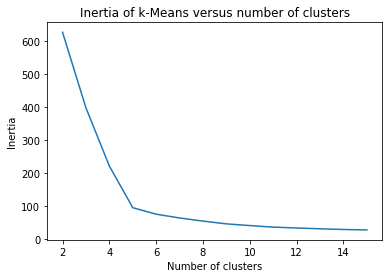

In [37]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_kmeams).inertia_ for i in range(2,16)]

plt.plot(np.arange(2, 16), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [25]:
# km_2 = KMeans(n_clusters=2,n_init=25, random_state=123)
# km_2.fit(df_kmeams)
# df_kmeams['kmeans_2'] = km_2.labels_

# km_3 = KMeans(n_clusters=3,n_init=25, random_state=123)
# km_3.fit(df_kmeams)
# df_kmeams['kmeans_3'] = km_3.labels_ # Agregamos las etiquetas al df

# km_4 = KMeans(n_clusters=4,n_init=25, random_state=123)
# km_4.fit(df_kmeams)
# df_kmeams['kmeans_4'] = km_4.labels_ # Agregamos las etiquetas al df

# km_5 = KMeans(n_clusters=5,n_init=25, random_state=123)
# km_5.fit(df_kmeams)
# df_kmeams['kmeans_5'] = km_5.labels_ # Agregamos las etiquetas al df

km_6 = KMeans(n_clusters=5, random_state=123)
km_6.fit(df_kmeams)
df_kmeams['kmeans_6'] = km_6.labels_ # Agregamos las etiquetas al df

In [59]:
df_kmeams.kmeans_2.value_counts().sort_values(ascending=False)

1    313
0    232
Name: kmeans_2, dtype: int64

In [58]:
df_kmeams.kmeans_3.value_counts().sort_values(ascending=False)

1    232
2    198
0    115
Name: kmeans_3, dtype: int64

In [60]:
df_kmeams.kmeans_4.value_counts().sort_values(ascending=False)

0    198
2    156
1    115
3     76
Name: kmeans_4, dtype: int64

In [61]:
df_kmeams.kmeans_4.value_counts().sort_values(ascending=False)

0    198
2    156
1    115
3     76
Name: kmeans_4, dtype: int64

In [62]:
df_kmeams.kmeans_5.value_counts()

2    156
0    115
1    107
4     91
3     76
Name: kmeans_5, dtype: int64

In [26]:
df_kmeams.kmeans_6.value_counts()

0    150
1    149
2    114
3     92
4     40
Name: kmeans_6, dtype: int64

In [33]:
df_kmeams = df_filter_daily_scalar_pivot

In [35]:
ms = MeanShift(bin_seeding=True)

ms.fit(df_kmeams)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 2
